### Data optimization. Augmentation, cross validation

In this task we talk about methods of increasing dataset size.
We try to use small dataset more effective


In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

1. Data augmentation
Data augmentation helps to increase the diversity
 of data available for training models.

Data augmentation needed when:
 - dataset is small
 - few data for some classes and more for other classes
 - objects in dataset presented not on each situations

**Analyze your dataset and understand what data you miss for best augmentation!**

For example if dataset includes insufficient images can flip this images to get 2 times more,
but be careful, because flipped image can be incorrect or stay another class image.

And maybe you have many images with small objects but not many with large objects.
Add noise or crop the part with object on image.

Tensorflow has special method for images augmentation - **ImageDataGenerator**.
It's simple way to augmented data, but recommended do augmentation manually.

Lets see examples:

In [2]:
# Method for drawing augmented image.
def draw_augmented_images(data_generator):
    # generate images
    data_generator.fit(images)
    # create iterator
    image_iterator = data_generator.flow(images)
    # create plot for display images
    _, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

    for row in axes:
        # get one image from iterator and add it in plot for display
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    # show plot with images
    plt.show()

Make example of dataset wits single image to test ImageDataGenerator:

In [3]:
# load test image
import cv2
image = cv2.imread("images/cat.jpg")
# reshape image to dataset with single image. Its look like numpy array of images
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

1. Rotation

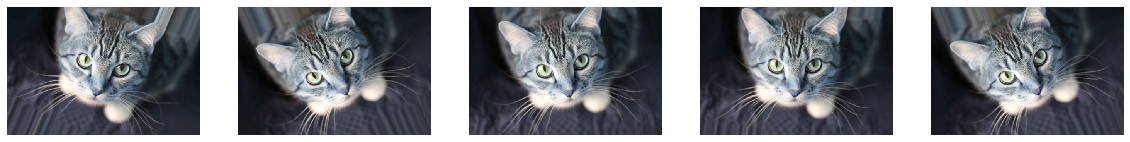

In [4]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30)
draw_augmented_images(data_generator)

2. Brightness

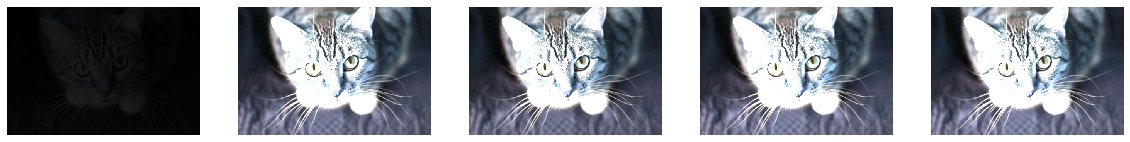

In [5]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.1, 1.9))
draw_augmented_images(data_generator)

3. Shift

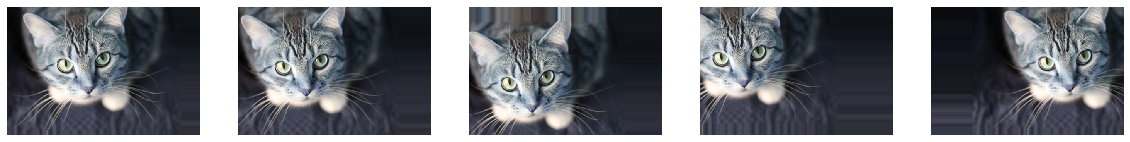

In [6]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.2)
draw_augmented_images(data_generator)

4. Zoom

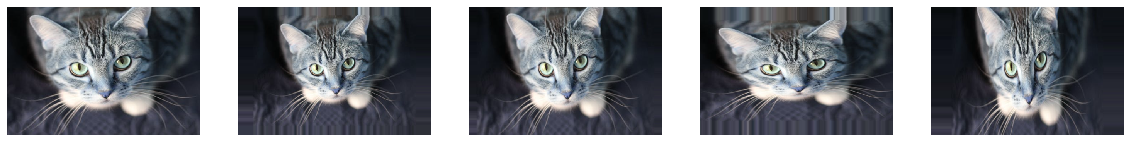

In [7]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.7, 1.3])
draw_augmented_images(data_generator)

4. Flip

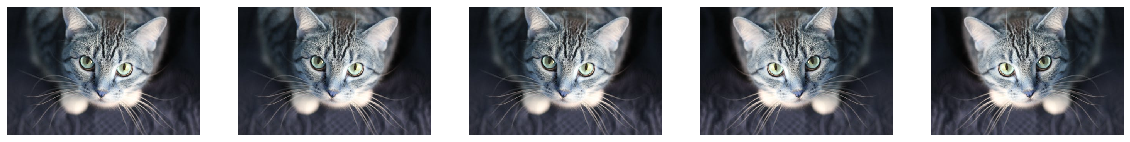

In [8]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
draw_augmented_images(data_generator)

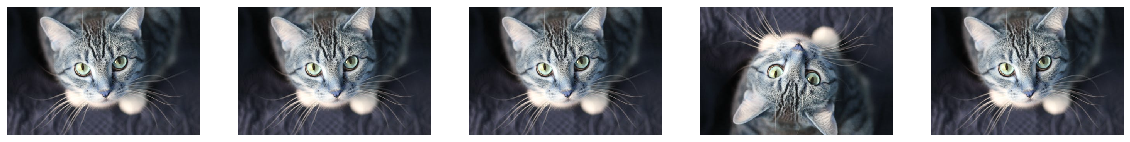

In [9]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
draw_augmented_images(data_generator)

ImageDataGenerator included more options.
See all of them on tensorflow [page](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Previous examples shows us how data transformed. But try to understand **how ImageDataGenerator works inside**.

Its accept batch of images, make the series of random transformations (such as rotation, zooming, shifting etc.),
replace original batch with transformed batch and take transformed batch to neural network.

Usually ImageDataGenerator used "on-the-fly" during network training.
Model train only on augmented data, the original data is not used for training.
Network see new variations of data on each epoch.
It helps to increase the generalizing ability of the model and its main goal of data augmentation with ImageDataGenerator.

In practice, this leads to a model that performs better on validation/testing data
but perhaps performs worse on training data (to due to the variations in data caused by the random transforms).

More information about data augmentation with ImageDataGenerator you can read in
[Adrian's Rosebrock website](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).


You can also generate many new images to increase the dataset:

```python
# TODO paste it after creating image data generator
# include 5 randomly generated batches same as dataset size
x_b, y_b = x_train, y_train
for e in range(5):
    x_batch, y_batch = datagen.flow(x_train, y_train, batch_size=len(x_train)).next()
    print(len(x_batch))
    x_b = numpy.append(x_b, x_batch, axis=0)
    y_b = numpy.append(y_b, y_batch, axis=0)
```

Lets try to use ImageDataGenerator.

Load dataset and get part of data (first 5000 images)

In [10]:
# Loading dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

In [11]:
# divide our train data to train and validation dataset
valid_part = int(len(x_train)*0.8) # 80 persent of data
x_train, x_valid = x_train[:valid_part], x_train[valid_part:]
y_train, y_valid = y_train[:valid_part], y_train[valid_part:]

# scale our data to 0..1 (each pixel)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape input data from (28, 28) to (28, 28, 1) - tensorflow format (tensor)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Resize data to lenet-5 input size (32x32 pixels)
w, h = 32, 32
x_train = tf.image.resize(x_train, (h, w))
x_valid = tf.image.resize(x_valid, (h, w))
x_test = tf.image.resize(x_test, (h, w))

# Reshape labels from 0..9 to vector with size 10 - tensorflow format (tensor)
# This method named One-hot encode.
y_train = tf.one_hot(y_train, 10)
y_valid = tf.one_hot(y_valid, 10)
y_test = tf.one_hot(y_test, 10)


Create ImageDataGenerator's for train, valid and test dataset.
ImageDataGenerator's do nothing with images, in our case its just for division on batches.


In [12]:
# train dataset generator
data_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=5, horizontal_flip=True)
train_generator = data_gen_train.flow(x_train, y_train, batch_size=16)
# valid dataset generator
data_gen_valid = tf.keras.preprocessing.image.ImageDataGenerator()
valid_generator = data_gen_train.flow(x_valid, y_valid, batch_size=16)
# test dataset generator
data_gen_test = tf.keras.preprocessing.image.ImageDataGenerator()
test_generator = data_gen_test.flow(x_test, y_test, batch_size=16)

Load model

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# dropout layer what we added
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# one more dropout layer what we added
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

Train our model and show test results

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/90
250/250 [==============================] - 3s 10ms/step - loss: 1.5294 - categorical_accuracy: 0.4450 - val_loss: 0.9909 - val_categorical_accuracy: 0.6430

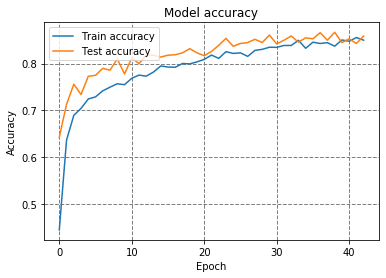

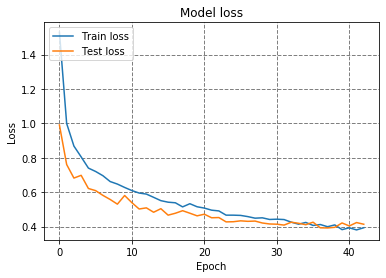

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=90, callbacks=[early_stopping], validation_data=valid_generator)
score = model.evaluate(test_generator, steps=len(test_generator), verbose=0)

print('\n', 'Test accuracy:', score[1], "Test loss:", score[0])

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.show()

How model train with ImageDataGenerator?
Dataset divided on the batches and we can see dataset_size/batch_size iterations on each epoch.

We get nice results with using a small number of images,
and this way helps to make model more generalizable which means better accuracy on on unknown data.
